# Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama

## İş Problemi

Bir oyun şirketi müşterilerinin bazı özelliklerini kullanarak seviye tabanlı (**level based**) yeni müşteri tanımları (**persona**) oluşturmak 
ve bu yeni müşteri tanımlarına göre segmentler oluşturup, bu segmentlere göre yeni gelebilecek müşterilerin şirkete 
ortalama ne kadar kazandırabileceğini tahmin etmek istemektedir.

Örneğin: Türkiye’den IOS kullanıcısı olan 25 yaşındaki bir erkek kullanıcının ortalama ne kadar kazandırabileceği belirlenmek isteniyor.


## Veri Seti Hikayesi

**Persona.csv** veri seti, uluslararası bir oyun şirketinin sattığı ürünlerin fiyatlarını ve bu ürünleri satın alan kullanıcıların bazı demografik bilgilerini barındırmaktadır.
Veri seti her satış işleminde oluşan kayıtlardan meydana gelmektedir. 
Bu nedenle tablo **tekilleştirilmemiştir**. Yani, belirli demografik özelliklere sahip bir kullanıcı birden fazla alışveriş yapmış olabilir.

- **PRICE:** Müşterinin harcama tutarı  
- **SOURCE:** Müşterinin bağlandığı cihaz türü  
- **SEX:** Müşterinin cinsiyeti  
- **COUNTRY:** Müşterinin ülkesi  
- **AGE:** Müşterinin yaşı  

### Veri Girişi ve Genel İstatistikler

In [2]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.2f' % x)
df = pd.read_csv('persona.csv')

# Genel bilgi
print(f"Veri seti boyutu: {df.shape[0]} satır, {df.shape[1]} sütun\n")
display(df.head())

print("\nVeri seti bilgisi:")
df.info()
display(df.describe().T)


Veri seti boyutu: 5000 satır, 5 sütun



,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17



Veri seti bilgisi:
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


,count,mean,std,min,25%,50%,75%,max
PRICE,5000.00,34.13,12.46,9.00,29.00,39.00,39.00,59.00
AGE,5000.00,23.58,9.00,15.00,17.00,21.00,27.00,66.00


### Veri Seti Keşfi ve Temel Analizler

In [5]:
unique_sources = df["SOURCE"].nunique()
print(f"Soru 2: Kaç unique SOURCE vardır? → {unique_sources}")
print("\nSOURCE frekansları:")
print(df["SOURCE"].value_counts())

unique_prices = df["PRICE"].nunique()
print(f"\nSoru 3: Kaç unique PRICE vardır? → {unique_prices}")

print("\nSoru 4: PRICE bazında satış sayıları:")
print(df["PRICE"].value_counts())

print("\nSoru 5: Ülkelere göre satış sayıları:")
print(df["COUNTRY"].value_counts())

print("\nGrup bazlı ülke satış sayıları:")
print(df.groupby("COUNTRY")["PRICE"].count())

print("\nSoru 6: Ülkelere göre toplam kazanç:")
print(df.groupby("COUNTRY").agg({"PRICE": "sum"}))

print("\nSoru 7: SOURCE türlerine göre satış sayıları:")
print(df["SOURCE"].value_counts())

print("\nSoru 8: Ülkelere göre PRICE ortalamaları:")
print(df.groupby("COUNTRY").agg({"PRICE": "mean"}))

print("\nSoru 9: SOURCE'lara göre PRICE ortalamaları:")
print(df.groupby("SOURCE").agg({"PRICE": "mean"}))

print("\nSoru 10: COUNTRY-SOURCE kırılımında PRICE ortalamaları:")
print(df.groupby(["COUNTRY", "SOURCE"]).agg({"PRICE": "mean"}))


Soru 2: Kaç unique SOURCE vardır? → 2

SOURCE frekansları:
SOURCE
android    2974
ios        2026
Name: count, dtype: int64

Soru 3: Kaç unique PRICE vardır? → 6

Soru 4: PRICE bazında satış sayıları:
PRICE
29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: count, dtype: int64

Soru 5: Ülkelere göre satış sayıları:
COUNTRY
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: count, dtype: int64

Grup bazlı ülke satış sayıları:
COUNTRY
bra    1496
can     230
deu     455
fra     303
tur     451
usa    2065
Name: PRICE, dtype: int64

Soru 6: Ülkelere göre toplam kazanç:
         PRICE
COUNTRY       
bra      51354
can       7730
deu      15485
fra      10177
tur      15689
usa      70225

Soru 7: SOURCE türlerine göre satış sayıları:
SOURCE
android    2974
ios        2026
Name: count, dtype: int64

Soru 8: Ülkelere göre PRICE ortalamaları:
         PRICE
COUNTRY       
bra      34.33
can      33.61
deu      34.03
fra      33.59
tur      34.79

### COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazanç

In [8]:
avg_price = (
    df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"])
      .agg({"PRICE": "mean"})
      .reset_index()  # Gruplama sonrası index sıfırlanır
)

avg_price.head()


,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,female,15,38.71
1,bra,android,female,16,35.94
2,bra,android,female,17,35.67
3,bra,android,female,18,32.26
4,bra,android,female,19,35.21


### Fiyata Göre Azalan Sıralama ve İndeks Değerlerini Sütunlara Dönüştürme

In [11]:
#Prica'a göre sıralama
agg_df = (
    df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"])
      .agg({"PRICE": "mean"})
      .sort_values("PRICE", ascending=False)
)
agg_df.head()

agg_df = agg_df.reset_index()  #indeksteki isimleri değişken haline getirdik.
agg_df.head() 

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.00
1,usa,android,male,36,59.00
2,fra,android,female,24,59.00
3,usa,ios,male,32,54.00
4,deu,android,female,36,49.00


### AGE Değişkeninin Kategorik Hale Getirilmesi ve agg_df’e Eklenmesi

In [14]:
bins = [0, 18, 23, 30, 40, agg_df["AGE"].max()]
labels = ['0_18', '19_23', '24_30', '31_40', f'41_{agg_df["AGE"].max()}']
agg_df["age_cat"] = pd.cut(agg_df["AGE"], bins, labels=labels)
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat
0,bra,android,male,46,59.00,41_66
1,usa,android,male,36,59.00,31_40
2,fra,android,female,24,59.00,24_30
3,usa,ios,male,32,54.00,31_40
4,deu,android,female,36,49.00,31_40


### Yeni Level-Based Müşteri Segmentlerinin Oluşturulması ve Ortalama Fiyat Analizi

In [17]:
#Yaş kategorisi
bins = [0, 18, 23, 30, 40, 70]
labels = ["0_18", "19_23", "24_30", "31_40", "41_70"]
agg_df["AGE_CAT"] = pd.cut(agg_df["AGE"], bins=bins, labels=labels)

#customers_level_based değişkeni
agg_df["customers_level_based"] = agg_df.apply(
    lambda row: f"{row['COUNTRY'].upper()}_{row['SOURCE'].upper()}_{row['SEX'].upper()}_{row['AGE_CAT']}",
    axis=1
)

#Gereksiz değişkenleri çıkar
agg_df = agg_df[["customers_level_based", "PRICE"]]

#groupby ile ortalama fiyat al
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE": "mean"}).reset_index()

#Kontrol
print(agg_df["customers_level_based"].value_counts())

#Örnek çıktı
print(agg_df.head())


customers_level_based
BRA_ANDROID_FEMALE_0_18    1
TUR_ANDROID_FEMALE_0_18    1
TUR_IOS_FEMALE_19_23       1
TUR_IOS_FEMALE_0_18        1
TUR_ANDROID_MALE_41_70     1
                          ..
CAN_IOS_MALE_41_70         1
CAN_IOS_MALE_31_40         1
CAN_IOS_MALE_24_30         1
CAN_IOS_MALE_0_18          1
USA_IOS_MALE_41_70         1
Name: count, Length: 109, dtype: int64
      customers_level_based  PRICE
0   BRA_ANDROID_FEMALE_0_18  35.65
1  BRA_ANDROID_FEMALE_19_23  34.08
2  BRA_ANDROID_FEMALE_24_30  33.86
3  BRA_ANDROID_FEMALE_31_40  34.90
4  BRA_ANDROID_FEMALE_41_70  36.74


### Ortalama PRICE Değerine Göre Yeni Müşteri Segmentlerinin Oluşturulması ve Betimlenmesi

In [21]:
# D en düşük, A en yüksek
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"])
print(agg_df.head(30))

# Ortalama ve Betimsel İstatistikler
segment_summary = agg_df.groupby("SEGMENT").agg({"PRICE": "mean"}).reset_index()
print(segment_summary)

       customers_level_based  PRICE SEGMENT
0    BRA_ANDROID_FEMALE_0_18  35.65       B
1   BRA_ANDROID_FEMALE_19_23  34.08       C
2   BRA_ANDROID_FEMALE_24_30  33.86       C
3   BRA_ANDROID_FEMALE_31_40  34.90       B
4   BRA_ANDROID_FEMALE_41_70  36.74       A
5      BRA_ANDROID_MALE_0_18  34.81       B
6     BRA_ANDROID_MALE_19_23  31.67       D
7     BRA_ANDROID_MALE_24_30  33.41       C
8     BRA_ANDROID_MALE_31_40  34.33       B
9     BRA_ANDROID_MALE_41_70  40.04       A
10       BRA_IOS_FEMALE_0_18  34.90       B
11      BRA_IOS_FEMALE_19_23  36.40       A
12      BRA_IOS_FEMALE_24_30  34.02       C
13      BRA_IOS_FEMALE_31_40  29.88       D
14      BRA_IOS_FEMALE_41_70  35.34       B
15         BRA_IOS_MALE_0_18  34.66       B
16        BRA_IOS_MALE_19_23  34.27       B
17        BRA_IOS_MALE_24_30  33.86       C
18        BRA_IOS_MALE_31_40  31.57       D
19        BRA_IOS_MALE_41_70  31.08       D
20   CAN_ANDROID_FEMALE_0_18  30.90       D
21  CAN_ANDROID_FEMALE_19_23  32

C:\Users\user\AppData\Local\Temp\ipykernel_7684\1248035006.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = agg_df.groupby("SEGMENT").agg({"PRICE": "mean"}).reset_index()


### Yeni Müşteri Profillerine Göre Segmentasyon ve Beklenen Gelir Tahmini

In [24]:
new_users = [
    "TUR_ANDROID_FEMALE_31_40",  # 33 yaşında Android kullanan Türk kadın
    "FRA_IOS_FEMALE_31_40"       # 35 yaşında iOS kullanan Fransız kadın
]

for user in new_users:
    # Kullanıcının agg_df'deki ortalama gelirini getir
    user_data = agg_df[agg_df["customers_level_based"] == user]
    
    if not user_data.empty:
        avg_price = user_data["PRICE"].values[0]
        
        # Kullanıcının segmentini bul
        user_segment = user_data["SEGMENT"].values[0] if "SEGMENT" in agg_df.columns else "Segment bilgisi yok"
        
        print(f"Müşteri: {user}")
        print(f" - Beklenen Ortalama Gelir: {avg_price:.2f}")
        print(f" - Segment: {user_segment}")
        print("-" * 40)
    else:
        print(f"{user} için veri bulunamadı.")

Müşteri: TUR_ANDROID_FEMALE_31_40
 - Beklenen Ortalama Gelir: 41.83
 - Segment: A
----------------------------------------
Müşteri: FRA_IOS_FEMALE_31_40
 - Beklenen Ortalama Gelir: 32.82
 - Segment: C
----------------------------------------


🎉 Proje Tamamlandı! 🎉

Toplam Müşteri Segment Sayısı: 109
Toplam Segment Sayısı: 4



C:\Users\user\AppData\Local\Temp\ipykernel_7684\2604517813.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_df, x="SEGMENT", y="PRICE", order=["D", "C", "B", "A"], palette="viridis")


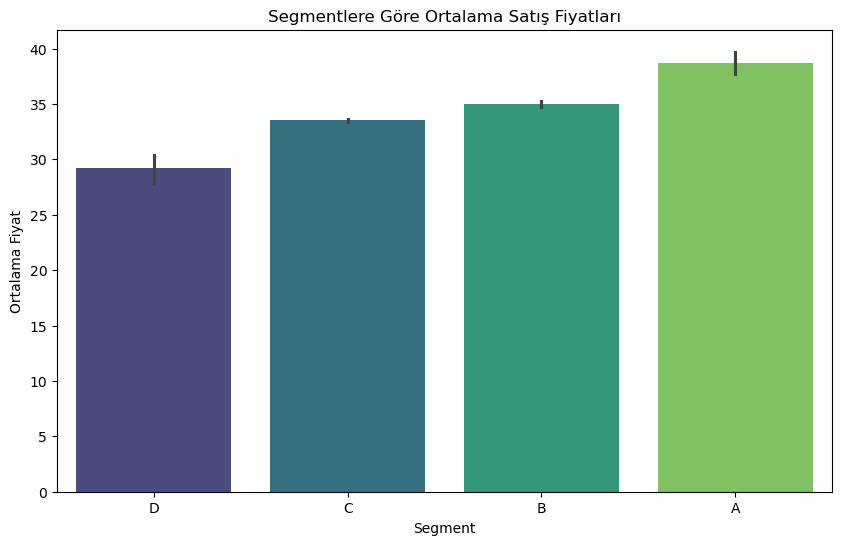

🔍 'TUR_ANDROID_FEMALE_31_40' müşterisi için tahmini segment ve fiyat bilgisi:


,customers_level_based,SEGMENT,PRICE
72,TUR_ANDROID_FEMALE_31_40,A,41.83



🚀 Proje satış verisi analizi başarıyla tamamlandı! Yeni müşteriler için ortalama kazanç tahminleri hazır. 👏


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

print("🎉 Proje Tamamlandı! 🎉\n")
print(f"Toplam Müşteri Segment Sayısı: {agg_df['customers_level_based'].nunique()}")
print(f"Toplam Segment Sayısı: {agg_df['SEGMENT'].nunique()}\n")

plt.figure(figsize=(10,6))
sns.barplot(data=agg_df, x="SEGMENT", y="PRICE", order=["D", "C", "B", "A"], palette="viridis")
plt.title("Segmentlere Göre Ortalama Satış Fiyatları")
plt.xlabel("Segment")
plt.ylabel("Ortalama Fiyat")
plt.show()

new_user = "TUR_ANDROID_FEMALE_31_40"
user_info = agg_df[agg_df["customers_level_based"] == new_user][["customers_level_based", "SEGMENT", "PRICE"]]

print(f"🔍 '{new_user}' müşterisi için tahmini segment ve fiyat bilgisi:")
if not user_info.empty:
    display(user_info)
else:
    print("Bu müşteri segmenti veri setinde bulunamadı.")

print("\n🚀 Proje satış verisi analizi başarıyla tamamlandı! Yeni müşteriler için ortalama kazanç tahminleri hazır. 👏")
